# Logistic Regression from scratch

In [8]:
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

class LogisticRegression:
    def __init__(self, n_iter=50, eta=0.01, random_state=1):
        self.n_iter=n_iter
        self.eta=eta
        self.random_state=random_state
        
    def fit(self, X, y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            
            cost=(-y.dot(np.log(output))-(1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, z):
        return 1/(1+np.exp(np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0, 1, 0)


#### Importing our Datasets

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
iris_data=load_iris()       
data=pd.DataFrame(iris_data.data)
y=(iris_data.target)
X=data.iloc[:, [2, 3]].values


#### Plotting Decision Regions

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker and colormap
    markers=["o", "x", "s", "p", "8", "d"]
    colors=["red", "blue", "green", "m", "cyan"]
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max=X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max=X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2=np.meshgrid(np.arange(x1_min,  x1_max, resolution), 
                         np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    plt.scatter(X[(y==0), 0], X[(y==0), 1], marker="x", color="m", 
                  linewidth=4)
    plt.scatter(X[(y==1), 0], X[(y==1), 1], marker="o", color="g", 
                  linewidth=4)


#### Data splitting and preprocessing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, 
                                                  stratify=y) 

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X_train=sc_X.fit_transform(X_train)

X_train_1=X_train[(y_train==0) | (y_train==1)]
y_train_1=y_train[(y_train==0) | (y_train==1)]


#### Modeling and plotting the Data

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


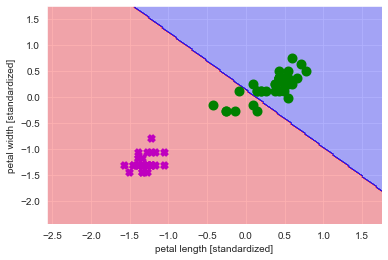

In [18]:
lr=LogisticRegression(eta=0.05, n_iter=1000, random_state=1)
lr.fit(X_train_1, y_train_1)

plot_decision_regions(X_train_1, y_train_1, classifier=lr)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")    

plt.show()  

X_test_std=sc_X.transform(X_test[(y_test==0) | (y_test==1)])
